## Search Each worker Time Series Model for Forecast

In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
# import numpy as np
# import joblib
# import os

# # Load the data
# df = pd.read_csv('/Users/minu/Desktop/R24-066/Component 04/Dataset/worker_defect_production_data.csv')

# # Convert Date column to datetime
# df['Date'] = pd.to_datetime(df['Date'])

# # Set Date as index
# df.set_index('Date', inplace=True)

# # List of defect types
# defect_types = ['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low']

# # Create a directory to save the forecasts if it doesn't exist
# forecast_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Dataset/each_worker_forecast_dataset'
# model_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Backend/each_worker_save_model'
# os.makedirs(forecast_output_dir, exist_ok=True)
# os.makedirs(model_output_dir, exist_ok=True)

# def train_arima_model(data, order=(1, 1, 1), steps=5):
#     model = ARIMA(data, order=order)
#     model_fit = model.fit()
#     forecast = model_fit.forecast(steps=steps)
#     return model_fit, forecast

# def calculate_rmse(observed, forecast):
#     mse = mean_squared_error(observed, forecast)
#     rmse = np.sqrt(mse)
#     return rmse

# def forecast_for_worker(worker_id, forecast_steps=5):
#     worker_data = df[df['Worker_ID'] == worker_id]
    
#     if worker_data.empty:
#         print(f"No data found for worker {worker_id}.")
#         return

#     # Plotting time series for each defect type for the selected worker
#     plt.figure(figsize=(14, 10))
#     for i, defect_type in enumerate(defect_types, 1):
#         plt.subplot(len(defect_types), 1, i)
#         plt.plot(worker_data.index, worker_data[defect_type], marker='o', linestyle='-', color='red')
#         plt.title(f'Previous data plot for {defect_type} (Worker {worker_id})')
#         plt.xlabel('Date')
#         plt.ylabel(f'{defect_type} Count')
#         plt.grid(True)
#     plt.tight_layout()
#     plt.show()

#     # Calculate summary statistics for each defect type for the selected worker
#     summary_stats = worker_data[defect_types].agg(['mean', 'sum']).transpose()

#     # Determine high and low defect types for the selected worker
#     high_defect_type = summary_stats['mean'].idxmax()
#     low_defect_type = summary_stats['mean'].idxmin()

#     print(f"High defect type for worker {worker_id}: {high_defect_type}")
#     print(f"Low defect type for worker {worker_id}: {low_defect_type}")

#     print()

#     # Calculate last week's high and low defect counts for the selected worker
#     last_week_data = worker_data.last('7D')
#     last_week_summary = last_week_data[defect_types].sum()
#     last_week_high_defect_type = last_week_summary.idxmax()
#     last_week_low_defect_type = last_week_summary.idxmin()
#     last_week_high_defect_count = last_week_summary.max()
#     last_week_low_defect_count = last_week_summary.min()

#     print(f"Worker {worker_id} - Last week's high defect type: {last_week_high_defect_type} with count: {last_week_high_defect_count}")
#     print(f"Worker {worker_id} - Last week's low defect type: {last_week_low_defect_type} with count: {last_week_low_defect_count}")

#     print()

#     # Train ARIMA models and make forecasts for each defect type for the selected worker
#     time_series_forecasts = pd.DataFrame(index=pd.date_range(start=worker_data.index[-1], periods=forecast_steps + 1, freq='B')[1:])
    
#     for defect_type in defect_types:
#         print(f"Training ARIMA model for {defect_type} (Worker {worker_id})...")
#         model_fit, forecast = train_arima_model(worker_data[defect_type], steps=forecast_steps)
#         time_series_forecasts[defect_type] = forecast

#         # Calculate RMSE
#         if len(worker_data[defect_type]) >= forecast_steps:
#             rmse = calculate_rmse(worker_data[defect_type][-forecast_steps:], forecast)
#             print(f"RMSE for {defect_type} (Worker {worker_id}): {rmse}")

#         # Plotting the results
#         plt.figure(figsize=(12, 6))
#         plt.plot(worker_data.index, worker_data[defect_type], label='Observed', color='blue')
#         future_dates = pd.date_range(start=worker_data.index[-1], periods=forecast_steps + 1, freq='B')[1:]
#         plt.plot(future_dates, forecast, label='Forecast', linestyle='--', marker='o', color='purple')
#         plt.title(f'Future forecast for {defect_type} (Worker {worker_id})')
#         plt.xlabel('Date')
#         plt.ylabel(f'{defect_type} Count')
#         plt.legend()
#         plt.grid(True)
#         plt.show()

#         # Print model summary
#         print(model_fit.summary())
    
#     # Save time series forecasts for the current worker
#     forecast_file = os.path.join(forecast_output_dir, f'time_series_forecasts_worker_{worker_id}.csv')
#     time_series_forecasts.to_csv(forecast_file)

#     # Save the ARIMA models for the current worker (optional)
#     model_file = os.path.join(model_output_dir, f'arima_model_worker_{worker_id}.pkl')
#     joblib.dump(model_fit, model_file)

# # Prompt user to select a worker ID and forecast
# worker_id = input("Enter the Worker ID: ")
# forecast_for_worker(worker_id)


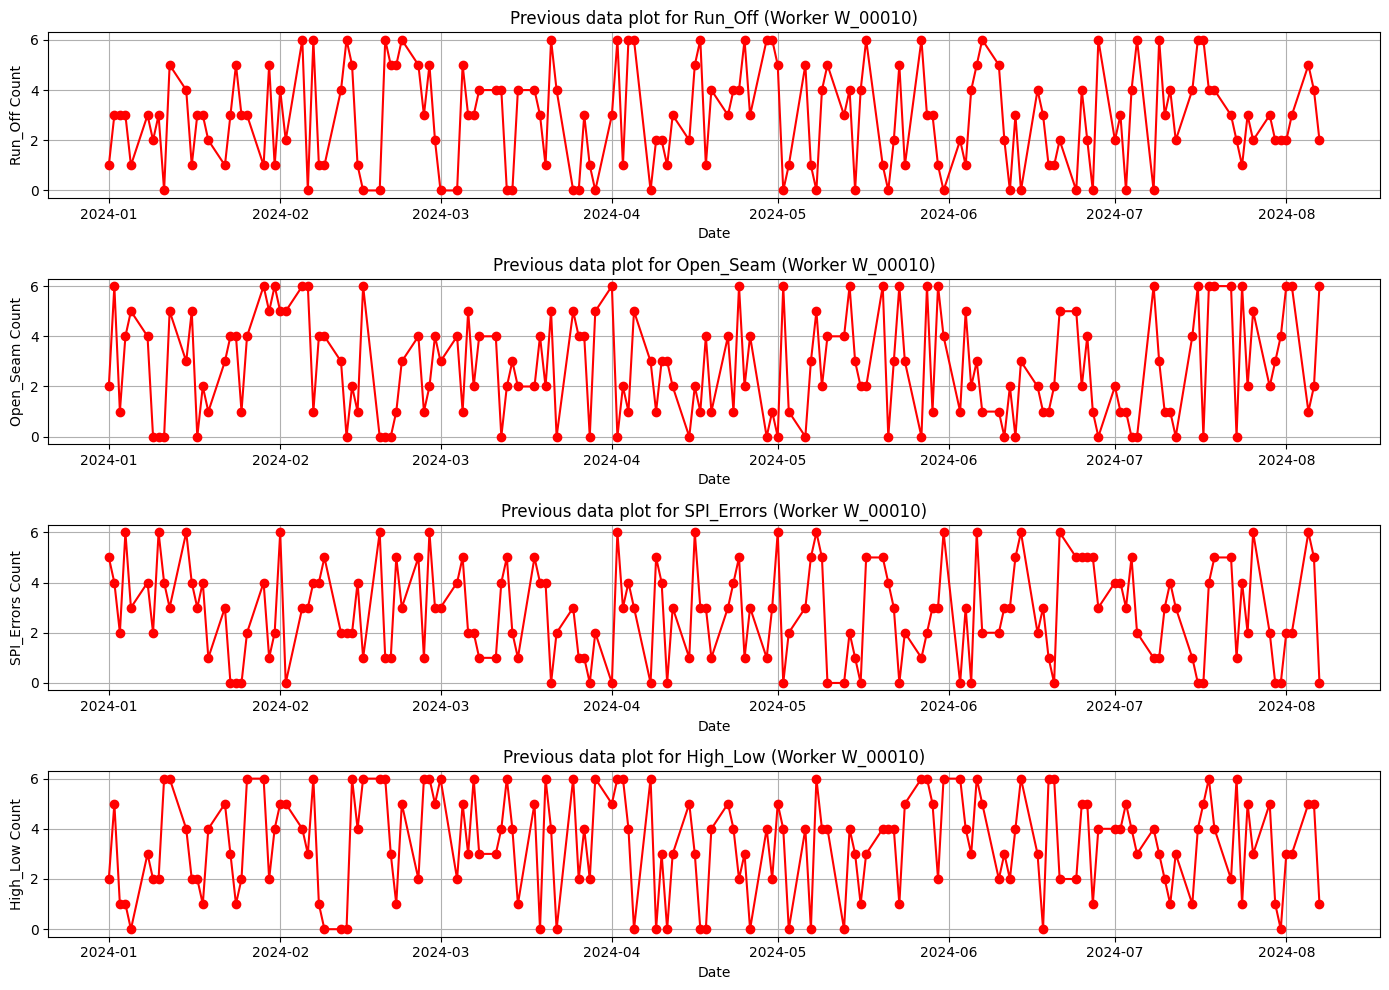

2024-09-01 00:38:36,161 - INFO - High defect type for worker W_00010: High_Low
2024-09-01 00:38:36,162 - INFO - Low defect type for worker W_00010: Open_Seam
/var/folders/68/8_7nlx1973v1qqcz0zq5wt8m0000gn/T/ipykernel_81301/2545087200.py:80: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  last_week_data = worker_data.last('7D')
2024-09-01 00:38:36,162 - INFO - Worker W_00010 - Last week's high defect type: Open_Seam with count: 21
2024-09-01 00:38:36,163 - INFO - Worker W_00010 - Last week's low defect type: SPI_Errors with count: 15
2024-09-01 00:38:36,163 - INFO - Training ARIMA model for Run_Off (Worker W_00010)...
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueW

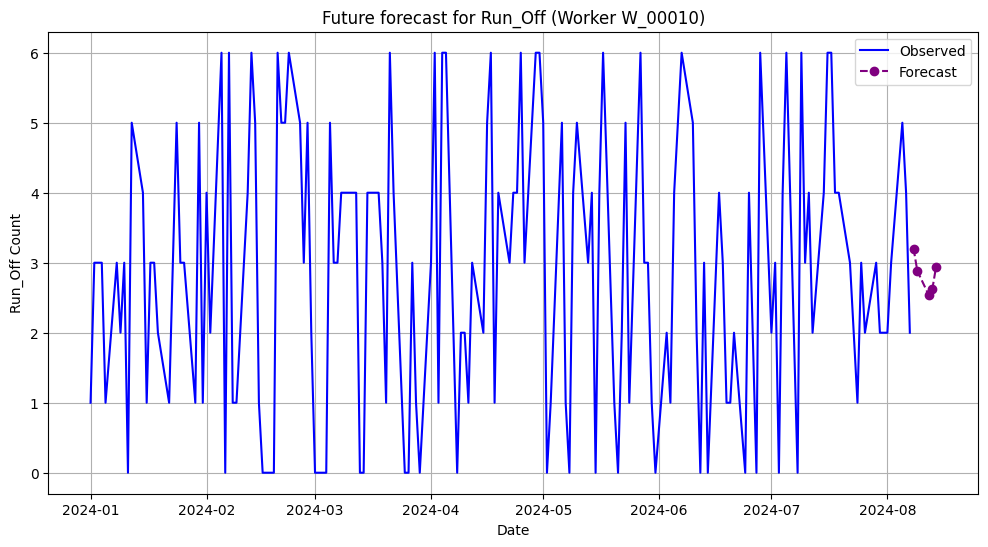

2024-09-01 00:38:36,410 - INFO - Training ARIMA model for Open_Seam (Worker W_00010)...
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
2024-09-01 00:38:36,505 - INFO - ARIMA model trained successfully with order (3, 0, 3)
2024-09-01 00:38:36,506 - INFO - RMSE for Open_Seam (Worker W_00010): 2.5629006617238232


                               SARIMAX Results                                
Dep. Variable:                Run_Off   No. Observations:                  158
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -326.888
Date:                Sun, 01 Sep 2024   AIC                            669.775
Time:                        00:38:36   BIC                            694.276
Sample:                    01-01-2024   HQIC                           679.725
                         - 08-07-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9143      0.168     17.307      0.000       2.584       3.244
ar.L1          0.4361      1.246      0.350      0.726      -2.006       2.878
ar.L2         -0.3695      1.250     -0.296      0.7

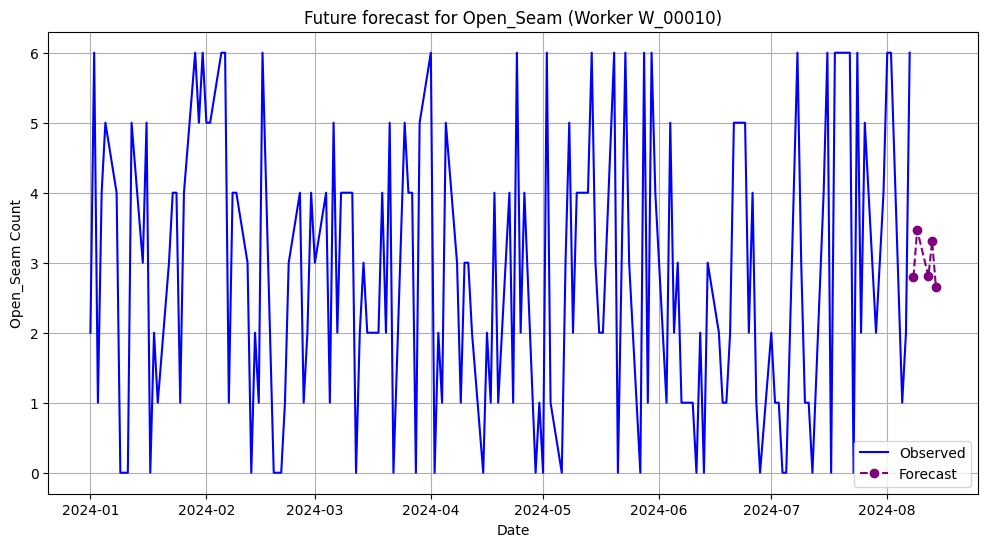

2024-09-01 00:38:36,601 - INFO - Training ARIMA model for SPI_Errors (Worker W_00010)...


                               SARIMAX Results                                
Dep. Variable:              Open_Seam   No. Observations:                  158
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -331.794
Date:                Sun, 01 Sep 2024   AIC                            679.589
Time:                        00:38:36   BIC                            704.090
Sample:                    01-01-2024   HQIC                           689.539
                         - 08-07-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8091      0.203     13.814      0.000       2.411       3.208
ar.L1          0.6937      0.209      3.317      0.001       0.284       1.104
ar.L2          0.7398      0.157      4.705      0.0

/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
2024-09-01 00:38:36,767 - INFO - ARIMA model trained successfully with order (3, 0, 3)
2024-09-01 00:38:36,768 - INFO - RMSE for SPI_Errors (Worker W_00010): 1.8407853334261697


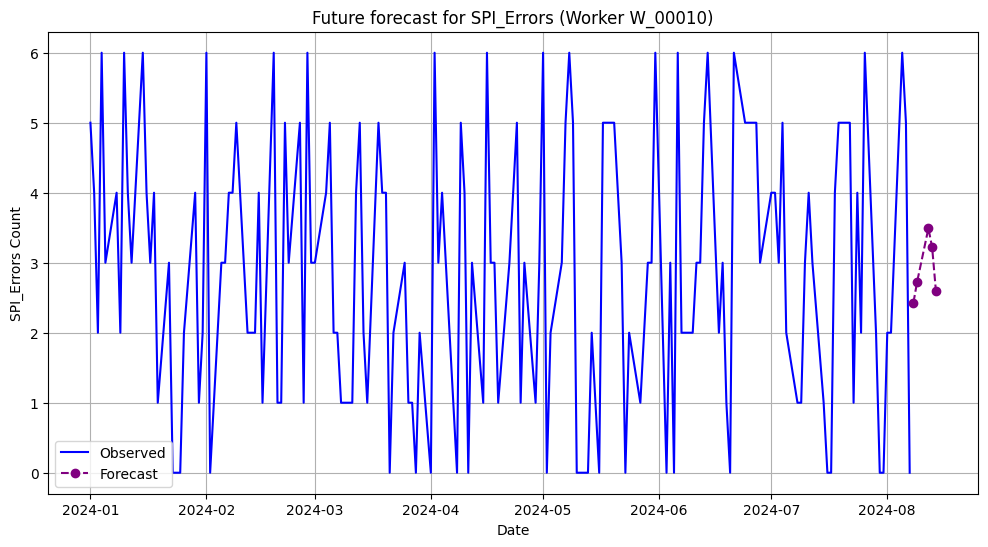

2024-09-01 00:38:36,853 - INFO - Training ARIMA model for High_Low (Worker W_00010)...
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
2024-09-01 00:38:36,947 - INFO - ARIMA model trained successfully with or

                               SARIMAX Results                                
Dep. Variable:             SPI_Errors   No. Observations:                  158
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -320.486
Date:                Sun, 01 Sep 2024   AIC                            656.971
Time:                        00:38:36   BIC                            681.472
Sample:                    01-01-2024   HQIC                           666.921
                         - 08-07-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8733      0.149     19.324      0.000       2.582       3.165
ar.L1          0.1752      0.841      0.208      0.835      -1.473       1.823
ar.L2         -0.6177      0.453     -1.365      0.1

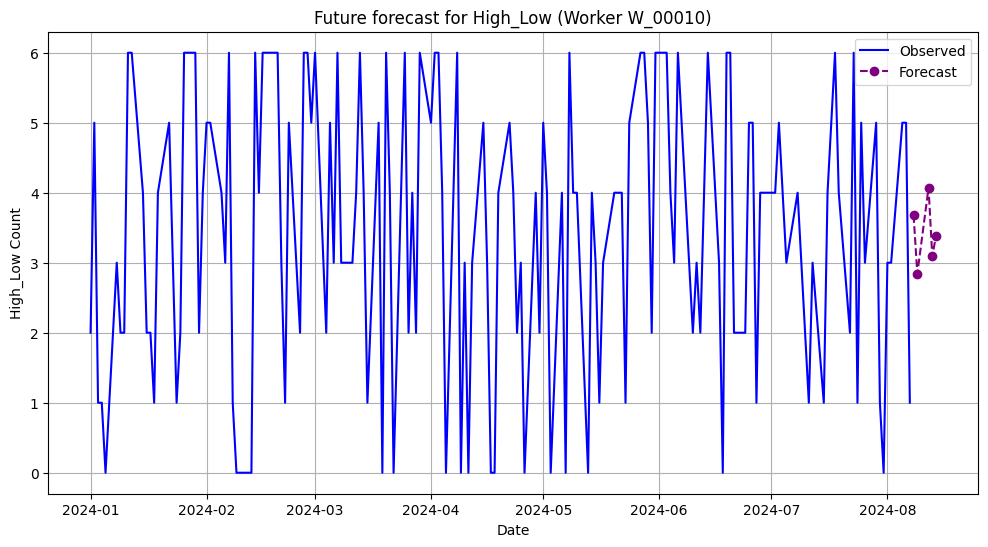

                               SARIMAX Results                                
Dep. Variable:               High_Low   No. Observations:                  158
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -326.794
Date:                Sun, 01 Sep 2024   AIC                            669.588
Time:                        00:38:37   BIC                            694.089
Sample:                    01-01-2024   HQIC                           679.538
                         - 08-07-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4334      0.160     21.412      0.000       3.119       3.748
ar.L1         -0.5203      2.005     -0.260      0.795      -4.450       3.409
ar.L2          0.3119      2.766      0.113      0.9

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib
import os
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load the data
df = pd.read_csv('/Users/minu/Desktop/R24-066/Component 04/Dataset/worker_defect_production_data.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['Date'], inplace=True)

# Set Date as index
df.set_index('Date', inplace=True)

# List of defect types
defect_types = ['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low']

# Create a directory to save the forecasts if it doesn't exist
forecast_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Dataset/each_worker_forecast_dataset'
model_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Backend/each_worker_save_model'
os.makedirs(forecast_output_dir, exist_ok=True)
os.makedirs(model_output_dir, exist_ok=True)

def train_arima_model(data, order=(3, 0, 3), steps=5):
    try:
        model = ARIMA(data, order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=steps)
        logging.info(f"ARIMA model trained successfully with order {order}")
        return model_fit, forecast
    except Exception as e:
        logging.error(f"Error in training ARIMA model: {e}")
        return None, None

def calculate_rmse(observed, forecast):
    mse = mean_squared_error(observed, forecast)
    rmse = np.sqrt(mse)
    return rmse

def forecast_for_worker(worker_id, forecast_steps=5):
    worker_data = df[df['Worker_ID'] == worker_id]
    
    if worker_data.empty:
        logging.warning(f"No data found for worker {worker_id}.")
        return

    # Plotting time series for each defect type for the selected worker
    plt.figure(figsize=(14, 10))
    for i, defect_type in enumerate(defect_types, 1):
        plt.subplot(len(defect_types), 1, i)
        plt.plot(worker_data.index, worker_data[defect_type], marker='o', linestyle='-', color='red')
        plt.title(f'Previous data plot for {defect_type} (Worker {worker_id})')
        plt.xlabel('Date')
        plt.ylabel(f'{defect_type} Count')
        plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Calculate summary statistics for each defect type for the selected worker
    summary_stats = worker_data[defect_types].agg(['mean', 'sum']).transpose()

    # Determine high and low defect types for the selected worker
    high_defect_type = summary_stats['mean'].idxmax()
    low_defect_type = summary_stats['mean'].idxmin()

    logging.info(f"High defect type for worker {worker_id}: {high_defect_type}")
    logging.info(f"Low defect type for worker {worker_id}: {low_defect_type}")

    # Calculate last week's high and low defect counts for the selected worker
    last_week_data = worker_data.last('7D')
    if not last_week_data.empty:
        last_week_summary = last_week_data[defect_types].sum()
        last_week_high_defect_type = last_week_summary.idxmax()
        last_week_low_defect_type = last_week_summary.idxmin()
        last_week_high_defect_count = last_week_summary.max()
        last_week_low_defect_count = last_week_summary.min()

        logging.info(f"Worker {worker_id} - Last week's high defect type: {last_week_high_defect_type} with count: {last_week_high_defect_count}")
        logging.info(f"Worker {worker_id} - Last week's low defect type: {last_week_low_defect_type} with count: {last_week_low_defect_count}")
    else:
        logging.warning(f"No data available for the last week for worker {worker_id}")

    # Train ARIMA models and make forecasts for each defect type for the selected worker
    time_series_forecasts = pd.DataFrame(index=pd.date_range(start=worker_data.index[-1], periods=forecast_steps + 1, freq='B')[1:])
    
    for defect_type in defect_types:
        logging.info(f"Training ARIMA model for {defect_type} (Worker {worker_id})...")
        model_fit, forecast = train_arima_model(worker_data[defect_type], steps=forecast_steps)
        
        if model_fit is None:
            logging.warning(f"Skipping forecast for {defect_type} due to model training failure.")
            continue
        
        time_series_forecasts[defect_type] = forecast

        # Calculate RMSE
        if len(worker_data[defect_type]) >= forecast_steps:
            rmse = calculate_rmse(worker_data[defect_type][-forecast_steps:], forecast)
            logging.info(f"RMSE for {defect_type} (Worker {worker_id}): {rmse}")

        # Plotting the results
        plt.figure(figsize=(12, 6))
        plt.plot(worker_data.index, worker_data[defect_type], label='Observed', color='blue')
        future_dates = pd.date_range(start=worker_data.index[-1], periods=forecast_steps + 1, freq='B')[1:]
        plt.plot(future_dates, forecast, label='Forecast', linestyle='--', marker='o', color='purple')
        plt.title(f'Future forecast for {defect_type} (Worker {worker_id})')
        plt.xlabel('Date')
        plt.ylabel(f'{defect_type} Count')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Print model summary
        print(model_fit.summary())
    
    # Save time series forecasts for the current worker
    forecast_file = os.path.join(forecast_output_dir, f'time_series_forecasts_worker_{worker_id}.csv')
    time_series_forecasts.to_csv(forecast_file)

    # Save the ARIMA models for the current worker (optional)
    model_file = os.path.join(model_output_dir, f'arima_model_worker_{worker_id}.pkl')
    joblib.dump(model_fit, model_file)

# Prompt user to select a worker ID and forecast
worker_id = input("Enter the Worker ID: ")
forecast_for_worker(worker_id)


2024-09-01 10:58:03,185 - INFO - Training ARIMA model for Run_Off (Worker W_00001)...
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
2024-09-01 10:58:03,483 - INFO - ARIMA model trained successfully with ord

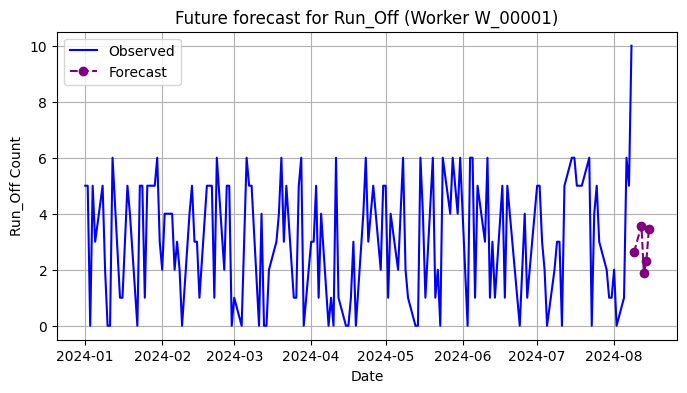

2024-09-01 10:58:03,671 - INFO - Model for Run_Off saved at /Users/minu/Desktop/R24-066/Component 04/Backend/each_worker_save_model/arima_model_worker_W_00001_Run_Off.pkl
2024-09-01 10:58:03,672 - INFO - Training ARIMA model for Open_Seam (Worker W_00001)...
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting aut

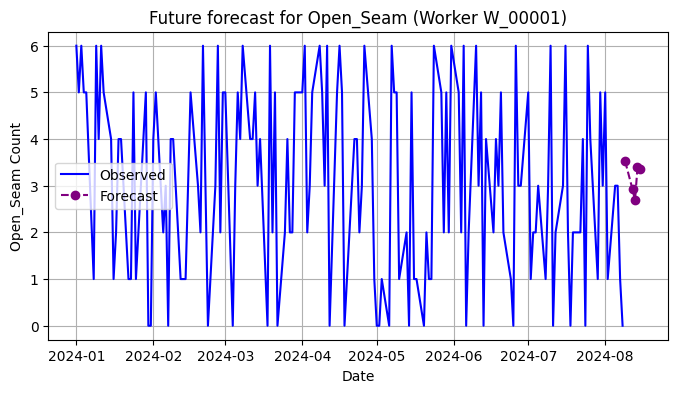

2024-09-01 10:58:03,924 - INFO - Model for Open_Seam saved at /Users/minu/Desktop/R24-066/Component 04/Backend/each_worker_save_model/arima_model_worker_W_00001_Open_Seam.pkl
2024-09-01 10:58:03,924 - INFO - Training ARIMA model for SPI_Errors (Worker W_00001)...
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
2024-09-01 10:58:04,010 - INFO - ARIMA model trained successfully with order (3, 0, 3)
2024-09-01 10:58:04,012 - INFO - R

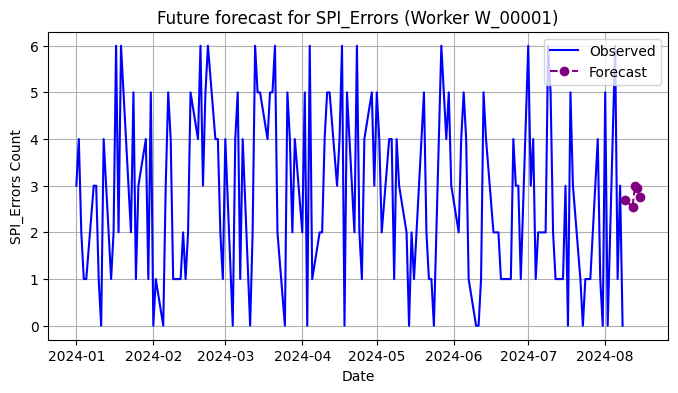

2024-09-01 10:58:04,146 - INFO - Model for SPI_Errors saved at /Users/minu/Desktop/R24-066/Component 04/Backend/each_worker_save_model/arima_model_worker_W_00001_SPI_Errors.pkl
2024-09-01 10:58:04,146 - INFO - Training ARIMA model for High_Low (Worker W_00001)...
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

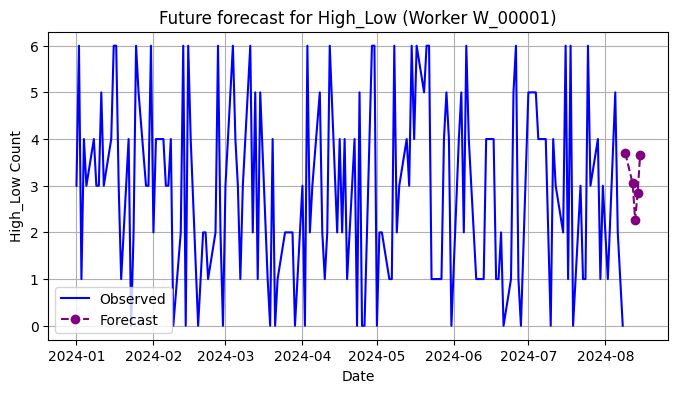

2024-09-01 10:58:04,616 - INFO - Model for High_Low saved at /Users/minu/Desktop/R24-066/Component 04/Backend/each_worker_save_model/arima_model_worker_W_00001_High_Low.pkl
2024-09-01 10:58:04,626 - INFO - Forecasts saved at /Users/minu/Desktop/R24-066/Component 04/Dataset/each_worker_forecast_dataset/time_series_forecasts_worker_W_00001.csv


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import joblib
import os
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load the data
df = pd.read_csv('/Users/minu/Desktop/R24-066/Component 04/Dataset/worker_defect_production_data.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates
df.dropna(subset=['Date'], inplace=True)

# Set Date as index
df.set_index('Date', inplace=True)

# List of defect types
defect_types = ['Run_Off', 'Open_Seam', 'SPI_Errors', 'High_Low']

# Create directories to save forecasts and models if they don't exist
forecast_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Dataset/each_worker_forecast_dataset'
model_output_dir = '/Users/minu/Desktop/R24-066/Component 04/Backend/each_worker_save_model'
os.makedirs(forecast_output_dir, exist_ok=True)
os.makedirs(model_output_dir, exist_ok=True)

def train_arima_model(data, order=(3, 0, 3), steps=5):
    """
    Train an ARIMA model for a given time series data.
    """
    try:
        model = ARIMA(data, order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=steps)
        logging.info(f"ARIMA model trained successfully with order {order}")
        return model_fit, forecast
    except Exception as e:
        logging.error(f"Error in training ARIMA model: {e}")
        return None, None

def calculate_rmse(observed, forecast):
    """
    Calculate Root Mean Square Error (RMSE) between observed and forecasted values.
    """
    mse = mean_squared_error(observed, forecast)
    rmse = np.sqrt(mse)
    return rmse

def forecast_for_worker(worker_id, forecast_steps=5):
    """
    Forecast defect counts for each defect type for a specific worker using ARIMA.
    """
    worker_data = df[df['Worker_ID'] == worker_id]
    
    if worker_data.empty:
        logging.warning(f"No data found for worker {worker_id}.")
        return

    # Create a DataFrame to store forecasts
    time_series_forecasts = pd.DataFrame(index=pd.date_range(start=worker_data.index[-1], periods=forecast_steps + 1, freq='B')[1:])
    
    for defect_type in defect_types:
        logging.info(f"Training ARIMA model for {defect_type} (Worker {worker_id})...")
        model_fit, forecast = train_arima_model(worker_data[defect_type], steps=forecast_steps)
        
        if model_fit is None:
            logging.warning(f"Skipping forecast for {defect_type} due to model training failure.")
            continue
        
        # Store forecast
        time_series_forecasts[defect_type] = forecast

        # Calculate RMSE if there is enough data
        if len(worker_data[defect_type]) >= forecast_steps:
            rmse = calculate_rmse(worker_data[defect_type][-forecast_steps:], forecast)
            logging.info(f"RMSE for {defect_type} (Worker {worker_id}): {rmse}")

        # Plotting the results
        plt.figure(figsize=(8, 4))
        plt.plot(worker_data.index, worker_data[defect_type], label='Observed', color='blue')
        future_dates = pd.date_range(start=worker_data.index[-1], periods=forecast_steps + 1, freq='B')[1:]
        plt.plot(future_dates, forecast, label='Forecast', linestyle='--', marker='o', color='purple')
        plt.title(f'Future forecast for {defect_type} (Worker {worker_id})')
        plt.xlabel('Date')
        plt.ylabel(f'{defect_type} Count')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Save the ARIMA model
        model_file = os.path.join(model_output_dir, f'arima_model_worker_{worker_id}_{defect_type}.pkl')
        joblib.dump(model_fit, model_file)
        logging.info(f"Model for {defect_type} saved at {model_file}")

    # Save time series forecasts for the current worker
    forecast_file = os.path.join(forecast_output_dir, f'time_series_forecasts_worker_{worker_id}.csv')
    time_series_forecasts.to_csv(forecast_file)
    logging.info(f"Forecasts saved at {forecast_file}")

# Prompt user to select a worker ID and forecast
worker_id = input("Enter the Worker ID: ")
forecast_for_worker(worker_id)